In [4]:
import requests      # Для запросов по API
import json          # Для обработки полученных результатов
import time          # Для задержки между запросами
import os            # Для работы с файлами
import pandas as pd  # Для формирования датафрейма с результатами
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import requests

headers = {
    'authority': 'api.zp.ru',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'device': '0f13a0c0-808e-11ee-b5a2-0f88cf64a5fb',
    'dnt': '1',
    'hh-user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 OPR/102.0.0.0 (UUID: 0f13a0c0-808e-11ee-b5a2-0f88cf64a5fb) (ZP_FRANCHISE: zarplata)',
    'origin': 'https://russia.zarplata.ru',
    'referer': 'https://russia.zarplata.ru/',
    'sec-ch-ua': '"Chromium";v="116", "Not)A;Brand";v="24", "Opera GX";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'cross-site',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 OPR/102.0.0.0',
}

params = {
    'search_type': 'fullThrottle',
    'offset': '25',
    'average_salary': 'true',
    'categories_facets': 'true',
    'highlight': 'true',
    'state': '1',
    'explain': '1',
    'geo_id': '113',
    'agglomeration_vacancies_count_facets': '1',
    'rubric_filter_mode': 'new',
}

response = requests.get('https://api.zp.ru/v1/collapsed_vacancies', params=params, headers=headers)
response.text

'{"metadata":{"resultset":{"count":248877,"limit":25,"offset":25},"query":{"search_type":"fullThrottle","offset":"25","average_salary":true,"categories_facets":true,"highlight":true,"state":"1","explain":"1","geo_id":"113","agglomeration_vacancies_count_facets":"1","rubric_filter_mode":"new","limit":25,"is_premium":true},"categories_facets":[{"id":432,"title":"\\u0422\\u043e\\u0440\\u0433\\u043e\\u0432\\u043b\\u044f \\u0440\\u043e\\u0437\\u043d\\u0438\\u0447\\u043d\\u0430\\u044f","count":48273,"specialities":[{"id":590,"title":"\\u0422\\u043e\\u0432\\u0430\\u0440\\u044b \\u043d\\u0430\\u0440\\u043e\\u0434\\u043d\\u043e\\u0433\\u043e \\u043f\\u043e\\u0442\\u0440\\u0435\\u0431\\u043b\\u0435\\u043d\\u0438\\u044f","count":34276},{"id":585,"title":"\\u041f\\u0440\\u043e\\u0434\\u0443\\u043a\\u0442\\u044b \\u043f\\u0438\\u0442\\u0430\\u043d\\u0438\\u044f","count":35750},{"id":595,"title":"\\u041a\\u0430\\u0441\\u0441\\u0430","count":31834},{"id":434,"title":"\\u041d\\u0430\\u0447\\u0430\\u04

In [8]:
def get_page_trud(page=0):
    """Gets a page of vacancies.

    Args:
      page: The page number.

    Returns:
      A JSON object containing the vacancies.
    """

    params = {
        "offset": page,
    }

    req = requests.get("https://api.zp.ru/v1/collapsed_vacancies", params)

    data = req.content.decode()
    req.close()

    return data


trud_jobs_objs = []

for page in range(0, 160):
    jobs_obj = json.loads(get_page_trud(page))
    trud_jobs_objs.append(jobs_obj)
    time.sleep(0.25)

print("finished the search")
len(trud_jobs_objs)

finished the search


160

In [9]:
trud_jobs_objs[159]['vacancies'][0]

{'working_type': {'id': 309, 'title': 'полная занятость'},
 'owner_id': 6214171,
 'is_available_for_invalids': False,
 'mod_date': '2023-11-12T00:02:29+03:00',
 'add_date': '2023-11-12T00:02:29+03:00',
 'show_email': True,
 'show_phone': True,
 'salary': '42 500 - 48 500 ₽',
 'logo_in_list': True,
 'archive_date': None,
 'id': 88255535,
 'contact': {'skype': None,
  'address': None,
  'microdistrict': [],
  'subway': [],
  'city': {'id': 4, 'title': 'Новосибирск'},
  'icq': None,
  'district': [],
  'name': 'Единый центр НСК',
  'phones': [],
  'email': 'jobsib@lenta.com',
  'room': None,
  'url': ''},
 'is_commerce': True,
 'state': 1,
 'canonical_url': 'https://nsk.zarplata.ru/vacancy/card/id88255535/prodavets',
 'update_date': '2023-11-12T00:02:29+03:00',
 'is_premium': True,
 'is_upped': False,
 'is_salary_gross': True,
 'header': 'Продавец',
 'description': 'Среднее образование. Трудолюбие, исполнительность, аккуратность.Выкладка товара в торговом зале. Контроль наличия ценников н

In [10]:
len(trud_jobs_objs[99]['vacancies'])

25

In [11]:
jobs_from_zarplata = []
for i in range(len(trud_jobs_objs)):
  for j in range(25):
    jobs_from_zarplata.append(trud_jobs_objs[i]['vacancies'][j])
  print(f"{i} added")

0 added
1 added
2 added
3 added
4 added
5 added
6 added
7 added
8 added
9 added
10 added
11 added
12 added
13 added
14 added
15 added
16 added
17 added
18 added
19 added
20 added
21 added
22 added
23 added
24 added
25 added
26 added
27 added
28 added
29 added
30 added
31 added
32 added
33 added
34 added
35 added
36 added
37 added
38 added
39 added
40 added
41 added
42 added
43 added
44 added
45 added
46 added
47 added
48 added
49 added
50 added
51 added
52 added
53 added
54 added
55 added
56 added
57 added
58 added
59 added
60 added
61 added
62 added
63 added
64 added
65 added
66 added
67 added
68 added
69 added
70 added
71 added
72 added
73 added
74 added
75 added
76 added
77 added
78 added
79 added
80 added
81 added
82 added
83 added
84 added
85 added
86 added
87 added
88 added
89 added
90 added
91 added
92 added
93 added
94 added
95 added
96 added
97 added
98 added
99 added
100 added
101 added
102 added
103 added
104 added
105 added
106 added
107 added
108 added
109 added
110 added


In [12]:
len(jobs_from_zarplata)

4000

2500

In [13]:
jobs_data = jobs_from_zarplata

In [14]:
jobs_data[200]

{'working_type': {'id': 309, 'title': 'полная занятость'},
 'owner_id': 6214171,
 'is_available_for_invalids': False,
 'mod_date': '2023-11-12T00:02:29+03:00',
 'add_date': '2023-11-12T00:02:29+03:00',
 'show_email': True,
 'show_phone': True,
 'salary': '42 500 - 48 500 ₽',
 'logo_in_list': True,
 'archive_date': None,
 'id': 88255535,
 'contact': {'skype': None,
  'address': None,
  'microdistrict': [],
  'subway': [],
  'city': {'id': 4, 'title': 'Новосибирск'},
  'icq': None,
  'district': [],
  'name': 'Единый центр НСК',
  'phones': [],
  'email': 'jobsib@lenta.com',
  'room': None,
  'url': ''},
 'is_commerce': True,
 'state': 1,
 'canonical_url': 'https://nsk.zarplata.ru/vacancy/card/id88255535/prodavets',
 'update_date': '2023-11-12T00:02:29+03:00',
 'is_premium': True,
 'is_upped': False,
 'is_salary_gross': True,
 'header': 'Продавец',
 'description': 'Среднее образование. Трудолюбие, исполнительность, аккуратность.Выкладка товара в торговом зале. Контроль наличия ценников н

In [15]:
jobs = []
# Iterate through each job data
for job_data in jobs_data:
    # Create a dictionary to store the parsed job information
    job = {}

    # Extract the job title
    job["job_title"] = job_data["header"]
    
    # Extract the working type
    job["working_type"] = job_data["working_type"]["title"]

    # Extract the salary range
    job["salary_from"] = job_data["salary_min"]
    job["salary_to"] = job_data["salary_min"]

    # Extract the experience level
    job["experience"] = job_data["experience_length"]["title"]

    # Extract the region
    if job_data.get("region"):
        job["region"] = job_data["region"]["name"]
    # job["region"] = job_data["contact"]["address"]

    # Append the parsed job information to the list
    jobs.append(job)

# Print the parsed jobs
print(jobs)

[{'job_title': 'Продавец', 'working_type': 'полная занятость', 'salary_from': 42500, 'salary_to': 42500, 'experience': 'без опыта'}, {'job_title': 'Ночной оператор колл-центра на входящие звонки (без продаж, возможно удаленно)', 'working_type': 'полная занятость', 'salary_from': 47000, 'salary_to': 47000, 'experience': 'без опыта'}, {'job_title': 'Оператор call-центра (исходящая линия)', 'working_type': 'полная занятость', 'salary_from': 40000, 'salary_to': 40000, 'experience': 'без опыта'}, {'job_title': 'Менеджер по сопровождению персонала', 'working_type': 'полная занятость', 'salary_from': 50000, 'salary_to': 50000, 'experience': 'без опыта'}, {'job_title': 'Удаленный оператор колл-центра на входящие звонки (без продаж)', 'working_type': 'полная занятость', 'salary_from': 32000, 'salary_to': 32000, 'experience': 'без опыта'}, {'job_title': 'Главный специалист по работе с розничными проблемными активами', 'working_type': 'полная занятость', 'salary_from': 40000, 'salary_to': 40000, 

In [17]:
jobs[1]

{'job_title': 'Ночной оператор колл-центра на входящие звонки (без продаж, возможно удаленно)',
 'working_type': 'полная занятость',
 'salary_from': 47000,
 'salary_to': 47000,
 'experience': 'без опыта'}

In [18]:
df = pd.DataFrame.from_dict(jobs)

In [19]:
df

,job_title,working_type,salary_from,salary_to,experience
0,Продавец,полная занятость,42500.0,42500.0,без опыта
1,Ночной оператор колл-центра на входящие звонки...,полная занятость,47000.0,47000.0,без опыта
2,Оператор call-центра (исходящая линия),полная занятость,40000.0,40000.0,без опыта
3,Менеджер по сопровождению персонала,полная занятость,50000.0,50000.0,без опыта
4,Удаленный оператор колл-центра на входящие зво...,полная занятость,32000.0,32000.0,без опыта
...,...,...,...,...,...
3995,Учитель физики,частичная занятость,60000.0,60000.0,1-3 года
3996,Начинающий технический специалист,полная занятость,42000.0,42000.0,без опыта
3997,Учитель физики,частичная занятость,60000.0,60000.0,1-3 года
3998,Автослесарь,полная занятость,70000.0,70000.0,1-3 года


In [20]:
df.to_csv('data_cillected.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_title     4000 non-null   object 
 1   working_type  4000 non-null   object 
 2   salary_from   3838 non-null   float64
 3   salary_to     3838 non-null   float64
 4   experience    4000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 156.4+ KB


In [22]:
import json

def get_page_trud(page=0):
  """Gets a page of vacancies from the Trudsvem API.

  Args:
    page: The page number.

  Returns:
    A JSON object containing the vacancies.
  """

  params = {
        'offset': page,
    }

  req = requests.get("http://opendata.trudvsem.ru/api/v1/vacancies", params)

  data = req.content.decode()
  req.close()

  return data

trud_jobs_objs = []

for page in range(0, 150):
  jobs_obj = json.loads(get_page_trud(page))
  trud_jobs_objs.append(jobs_obj)


  time.sleep(0.25)

print('finished the search')
len(trud_jobs_objs)

finished the search


150

In [23]:
trud_datas = []
for i in range(len(trud_jobs_objs)):
  if 'results' in trud_jobs_objs[i]:
    for s in range(100):
      trud_datas.append(trud_jobs_objs[i]['results']['vacancies'][s]['vacancy'])

In [24]:
len(trud_datas)

10000

In [25]:
def fit_trudsvem_data_to_dataset(vacancy):
    """Gets the desired fields from a vacancy.

    Args:
      vacancy: A vacancy.

    Returns:
      A dictionary containing the values of the desired fields.
    """

    results = {}
    results["job_title"] = vacancy.get("job-name", None)
    results["working_type"] = vacancy["schedule"]
    results["salary_from"] = vacancy["salary_min"]
    results["salary_to"] = vacancy["salary_max"]
    results["experience"] = vacancy["requirement"]["experience"]
    if vacancy.get("region"):
        results["region"] = vacancy["region"]["name"]
    results["salary_gross"] = vacancy.get("salary", None)
    results["education_name"] = vacancy["requirement"]["education"]
    return results

In [26]:
fit_trudsvem_data_to_dataset(trud_datas[9999])

{'job_title': 'Специалист по социальной работе',
 'working_type': 'Неполный рабочий день',
 'salary_from': 8121,
 'salary_to': 0,
 'experience': 0,
 'region': 'Саратовская область',
 'salary_gross': 'от 8121',
 'education_name': 'Не указано'}

In [27]:
trud_df = []
for i in range(len(trud_datas)):
    trud_df.append(fit_trudsvem_data_to_dataset(trud_datas[i]))

In [28]:
df_trud = pd.DataFrame.from_dict(trud_df)

In [29]:
df_trud

,job_title,working_type,salary_from,salary_to,experience,region,salary_gross,education_name
0,HR по подбору и развитию сети,Ненормированный рабочий день,18000,0,0,Тульская область,от 18000,Не указано
1,Специалист. Участок розничных товаров г. Чайко...,Полный рабочий день,19297,0,0,Пермский край,от 19297,Среднее профессиональное
2,Ведущий специалист в отдел имущественных отнош...,Полный рабочий день,30061,0,0,Пермский край,от 30061,Высшее
3,Требуются водители такси на автомобили компании,Сменный график,30000,60000,3,Город Севастополь,от 30000,Среднее
4,Требуются водители такси на ночные смены!!!,Сменный график,30000,60000,3,Город Севастополь,от 30000,Среднее
...,...,...,...,...,...,...,...,...
9995,Слесарь механосборочных работ,Сменный график,40000,0,1,Пермский край,от 40000,Не указано
9996,техник по наладке и испытаниям,Полный рабочий день,20000,0,4,Смоленская область,от 20000,Не указано
9997,Заготовщик химических растворов и красок,Сменный график,38000,0,0,Ивановская область,от 38000,Среднее профессиональное
9998,Учитель (преподаватель) физики,Неполный рабочий день,15000,20000,0,Ленинградская область,от 15000,Высшее


In [31]:
pd.concat([df, df_trud], axis=0).to_csv('data_jobs.csv')

In [52]:
data = pd.read_csv("data_jobs.csv")

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      14000 non-null  int64  
 1   job_title       13999 non-null  object 
 2   working_type    14000 non-null  object 
 3   salary_from     13838 non-null  float64
 4   salary_to       13838 non-null  float64
 5   experience      14000 non-null  object 
 6   region          10000 non-null  object 
 7   salary_gross    9437 non-null   object 
 8   education_name  10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 984.5+ KB


In [54]:
data = data.drop('Unnamed: 0', axis=1)

In [55]:
data = data.drop('salary_gross', axis=1)

In [56]:
data['education_name'].value_counts()

education_name
Не указано                  4433
Среднее профессиональное    2246
Высшее                      2092
Среднее                     1167
Среднее общее                 30
Основное общее                20
Незаконченное высшее          12
Name: count, dtype: int64

In [57]:
# Replace all NaN values in the `education_name` column with `любое`
data['education_name'].fillna('Любое', inplace=True)

In [58]:
data

,job_title,working_type,salary_from,salary_to,experience,region,education_name
0,Продавец,полная занятость,42500.0,42500.0,без опыта,NaN,Любое
1,Ночной оператор колл-центра на входящие звонки...,полная занятость,47000.0,47000.0,без опыта,NaN,Любое
2,Оператор call-центра (исходящая линия),полная занятость,40000.0,40000.0,без опыта,NaN,Любое
3,Менеджер по сопровождению персонала,полная занятость,50000.0,50000.0,без опыта,NaN,Любое
4,Удаленный оператор колл-центра на входящие зво...,полная занятость,32000.0,32000.0,без опыта,NaN,Любое
...,...,...,...,...,...,...,...
13995,Слесарь механосборочных работ,Сменный график,40000.0,0.0,1,Пермский край,Не указано
13996,техник по наладке и испытаниям,Полный рабочий день,20000.0,0.0,4,Смоленская область,Не указано
13997,Заготовщик химических растворов и красок,Сменный график,38000.0,0.0,0,Ивановская область,Среднее профессиональное
13998,Учитель (преподаватель) физики,Неполный рабочий день,15000.0,20000.0,0,Ленинградская область,Высшее


In [59]:
# Change the value of education_name to любое if it is equal to не указано
data['education_name'] = data['education_name'].replace('Не указано', 'Любое')

In [60]:
data

,job_title,working_type,salary_from,salary_to,experience,region,education_name
0,Продавец,полная занятость,42500.0,42500.0,без опыта,NaN,Любое
1,Ночной оператор колл-центра на входящие звонки...,полная занятость,47000.0,47000.0,без опыта,NaN,Любое
2,Оператор call-центра (исходящая линия),полная занятость,40000.0,40000.0,без опыта,NaN,Любое
3,Менеджер по сопровождению персонала,полная занятость,50000.0,50000.0,без опыта,NaN,Любое
4,Удаленный оператор колл-центра на входящие зво...,полная занятость,32000.0,32000.0,без опыта,NaN,Любое
...,...,...,...,...,...,...,...
13995,Слесарь механосборочных работ,Сменный график,40000.0,0.0,1,Пермский край,Любое
13996,техник по наладке и испытаниям,Полный рабочий день,20000.0,0.0,4,Смоленская область,Любое
13997,Заготовщик химических растворов и красок,Сменный график,38000.0,0.0,0,Ивановская область,Среднее профессиональное
13998,Учитель (преподаватель) физики,Неполный рабочий день,15000.0,20000.0,0,Ленинградская область,Высшее


In [61]:
data['region'].fillna('Россия', inplace=True)

In [62]:
data

,job_title,working_type,salary_from,salary_to,experience,region,education_name
0,Продавец,полная занятость,42500.0,42500.0,без опыта,Россия,Любое
1,Ночной оператор колл-центра на входящие звонки...,полная занятость,47000.0,47000.0,без опыта,Россия,Любое
2,Оператор call-центра (исходящая линия),полная занятость,40000.0,40000.0,без опыта,Россия,Любое
3,Менеджер по сопровождению персонала,полная занятость,50000.0,50000.0,без опыта,Россия,Любое
4,Удаленный оператор колл-центра на входящие зво...,полная занятость,32000.0,32000.0,без опыта,Россия,Любое
...,...,...,...,...,...,...,...
13995,Слесарь механосборочных работ,Сменный график,40000.0,0.0,1,Пермский край,Любое
13996,техник по наладке и испытаниям,Полный рабочий день,20000.0,0.0,4,Смоленская область,Любое
13997,Заготовщик химических растворов и красок,Сменный график,38000.0,0.0,0,Ивановская область,Среднее профессиональное
13998,Учитель (преподаватель) физики,Неполный рабочий день,15000.0,20000.0,0,Ленинградская область,Высшее


In [63]:
data["experience"].value_counts()

experience
0              5821
без опыта      2573
1              1707
1-3 года       1262
3               955
от 0            759
5               340
2               285
3-6 лет         164
4                72
10               35
6                17
7                 7
более 6 лет       1
20                1
8                 1
Name: count, dtype: int64

In [64]:
data

,job_title,working_type,salary_from,salary_to,experience,region,education_name
0,Продавец,полная занятость,42500.0,42500.0,без опыта,Россия,Любое
1,Ночной оператор колл-центра на входящие звонки...,полная занятость,47000.0,47000.0,без опыта,Россия,Любое
2,Оператор call-центра (исходящая линия),полная занятость,40000.0,40000.0,без опыта,Россия,Любое
3,Менеджер по сопровождению персонала,полная занятость,50000.0,50000.0,без опыта,Россия,Любое
4,Удаленный оператор колл-центра на входящие зво...,полная занятость,32000.0,32000.0,без опыта,Россия,Любое
...,...,...,...,...,...,...,...
13995,Слесарь механосборочных работ,Сменный график,40000.0,0.0,1,Пермский край,Любое
13996,техник по наладке и испытаниям,Полный рабочий день,20000.0,0.0,4,Смоленская область,Любое
13997,Заготовщик химических растворов и красок,Сменный график,38000.0,0.0,0,Ивановская область,Среднее профессиональное
13998,Учитель (преподаватель) физики,Неполный рабочий день,15000.0,20000.0,0,Ленинградская область,Высшее


In [65]:
experience_map = {
    "0": 0,
    "без опыта": 0,
    "1": 1,
    "1-3 года": 2,
    "3": 3,
    "от 0": 0,
    "5": 5,
    "2": 2,
    "3-6 лет": 3,
    "4": 4,
    "10": 10,
    "6": 6,
    "7": 7,
    "более 6 лет": 7,
    "20": 20,
    "8": 8
}

data['experience'] = data['experience'].map(experience_map)
data

,job_title,working_type,salary_from,salary_to,experience,region,education_name
0,Продавец,полная занятость,42500.0,42500.0,0,Россия,Любое
1,Ночной оператор колл-центра на входящие звонки...,полная занятость,47000.0,47000.0,0,Россия,Любое
2,Оператор call-центра (исходящая линия),полная занятость,40000.0,40000.0,0,Россия,Любое
3,Менеджер по сопровождению персонала,полная занятость,50000.0,50000.0,0,Россия,Любое
4,Удаленный оператор колл-центра на входящие зво...,полная занятость,32000.0,32000.0,0,Россия,Любое
...,...,...,...,...,...,...,...
13995,Слесарь механосборочных работ,Сменный график,40000.0,0.0,1,Пермский край,Любое
13996,техник по наладке и испытаниям,Полный рабочий день,20000.0,0.0,4,Смоленская область,Любое
13997,Заготовщик химических растворов и красок,Сменный график,38000.0,0.0,0,Ивановская область,Среднее профессиональное
13998,Учитель (преподаватель) физики,Неполный рабочий день,15000.0,20000.0,0,Ленинградская область,Высшее


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job_title       13999 non-null  object 
 1   working_type    14000 non-null  object 
 2   salary_from     13838 non-null  float64
 3   salary_to       13838 non-null  float64
 4   experience      14000 non-null  int64  
 5   region          14000 non-null  object 
 6   education_name  14000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 765.8+ KB


In [72]:
data["salary_to"].value_counts()

salary_to
0.0        4176
50000.0     942
40000.0     917
60000.0     621
70000.0     535
           ... 
28923.0       1
57442.0       1
44980.0       1
56485.0       1
30560.0       1
Name: count, Length: 743, dtype: int64

In [74]:
# Fill NaN values in salary_from with the mean of all non-NaN values
data["salary_from"].fillna(data["salary_from"].mean(), inplace=True)

# Fill NaN values in salary_to with the mean of all non-NaN values
data["salary_to"].fillna(data["salary_to"].mean(), inplace=True)

In [81]:
data["salary_from"] = data["salary_from"].astype(int)
data["salary_to"] = data["salary_to"].astype(int)

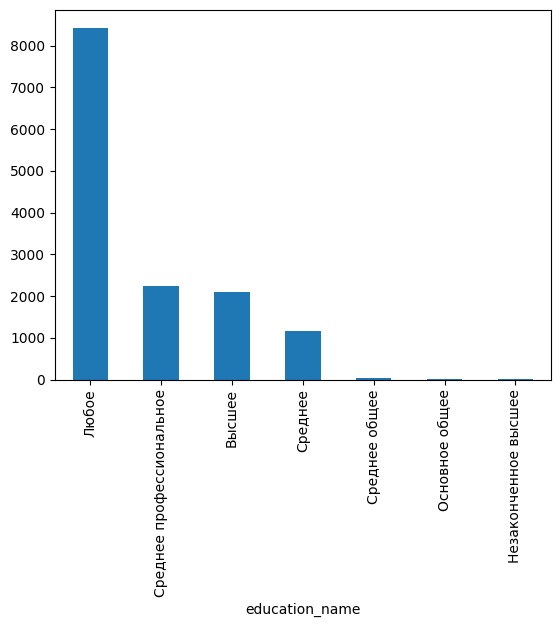

In [92]:
data['education_name'].value_counts().plot(kind='bar');

<AxesSubplot:xlabel='region'>

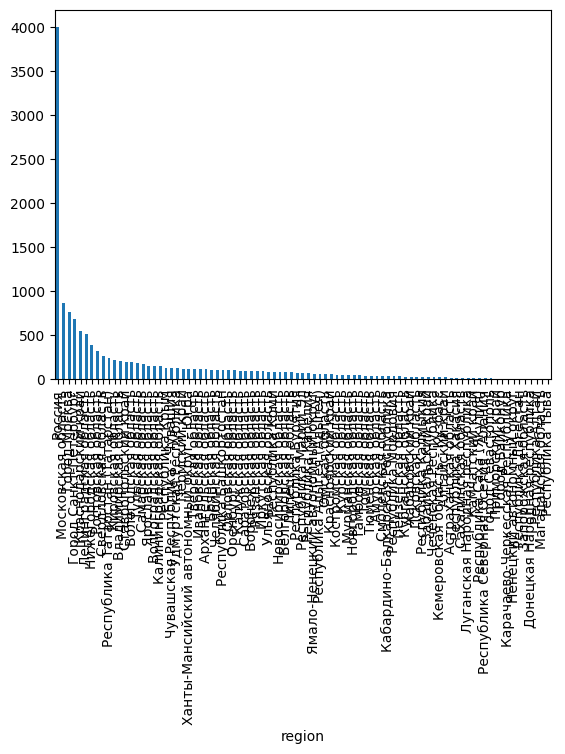

In [95]:
data['region'].value_counts().plot(kind='bar')

In [96]:
data.isna().sum()

job_title         1
working_type      0
salary_from       0
salary_to         0
experience        0
region            0
education_name    0
dtype: int64

In [97]:
data.describe()

,salary_from,salary_to,experience
count,14000.000000,14000.000000,14000.000000
mean,43577.891929,39000.263071,0.763000
std,28030.613609,38606.381119,1.321184
min,0.000000,0.000000,0.000000
25%,25000.000000,0.000000,0.000000
50%,40000.000000,40000.000000,0.000000
75%,50000.000000,55000.000000,1.000000
max,504000.000000,504000.000000,20.000000


In [99]:
data['education_name'].value_counts()

education_name
Любое                       8433
Среднее профессиональное    2246
Высшее                      2092
Среднее                     1167
Среднее общее                 30
Основное общее                20
Незаконченное высшее          12
Name: count, dtype: int64

In [100]:
data['education_name'] = data['education_name'].replace('Среднее', 'Среднее общее')

In [101]:
data['education_name'].value_counts()

education_name
Любое                       8433
Среднее профессиональное    2246
Высшее                      2092
Среднее общее               1197
Основное общее                20
Незаконченное высшее          12
Name: count, dtype: int64

In [102]:
value_map = {
    "Любое": 1,
    "Среднее профессиональное": 2,
    "Высшее": 3,
    "Среднее общее": 4,
    "Основное общее": 5,
    "Незаконченное высшее": 6
}
education_name_numbers = data['education_name'].map(value_map)
data.insert(loc=1, column='education_name_number', value=education_name_numbers)

In [103]:
data

,job_title,education_name_number,working_type,salary_from,salary_to,experience,region,education_name
0,Продавец,1,полная занятость,42500,42500,0,Россия,Любое
1,Ночной оператор колл-центра на входящие звонки...,1,полная занятость,47000,47000,0,Россия,Любое
2,Оператор call-центра (исходящая линия),1,полная занятость,40000,40000,0,Россия,Любое
3,Менеджер по сопровождению персонала,1,полная занятость,50000,50000,0,Россия,Любое
4,Удаленный оператор колл-центра на входящие зво...,1,полная занятость,32000,32000,0,Россия,Любое
...,...,...,...,...,...,...,...,...
13995,Слесарь механосборочных работ,1,Сменный график,40000,0,1,Пермский край,Любое
13996,техник по наладке и испытаниям,1,Полный рабочий день,20000,0,4,Смоленская область,Любое
13997,Заготовщик химических растворов и красок,2,Сменный график,38000,0,0,Ивановская область,Среднее профессиональное
13998,Учитель (преподаватель) физики,3,Неполный рабочий день,15000,20000,0,Ленинградская область,Высшее


In [104]:
data['working_type'].value_counts()

working_type
Полный рабочий день             6683
полная занятость                3512
Сменный график                  1952
Вахтовый метод                   620
частичная занятость              331
Неполный рабочий день            331
Гибкий график                    305
работа вахтовым методом          157
Ненормированный рабочий день     109
Name: count, dtype: int64

In [106]:
value_map = {
    "Полный рабочий день": 1,
    "полная занятость": 2,
    "Сменный график": 3,
    "Вахтовый метод": 4,
    "частичная занятость": 5,
    "Неполный рабочий день": 6,
    "Гибкий график": 7,
    "работа вахтовым методом": 8,
    "Ненормированный рабочий день": 9
}

working_type_numbers = data['working_type'].map(value_map)

data.insert(loc=1, column='working_type_number', value=working_type_numbers)

In [127]:
data.columns

Index(['job_title', 'working_type_number', 'education_name_number',
       'working_type', 'salary_from', 'salary_to', 'experience', 'region',
       'education_name'],
      dtype='object')

In [133]:
df = data[['working_type_number', 'education_name_number', 'salary_from', 'salary_to', 'experience']]

In [134]:
df

,working_type_number,education_name_number,salary_from,salary_to,experience
0,2,1,42500,42500,0
1,2,1,47000,47000,0
2,2,1,40000,40000,0
3,2,1,50000,50000,0
4,2,1,32000,32000,0
...,...,...,...,...,...
13995,3,1,40000,0,1
13996,1,1,20000,0,4
13997,3,2,38000,0,0
13998,6,3,15000,20000,0


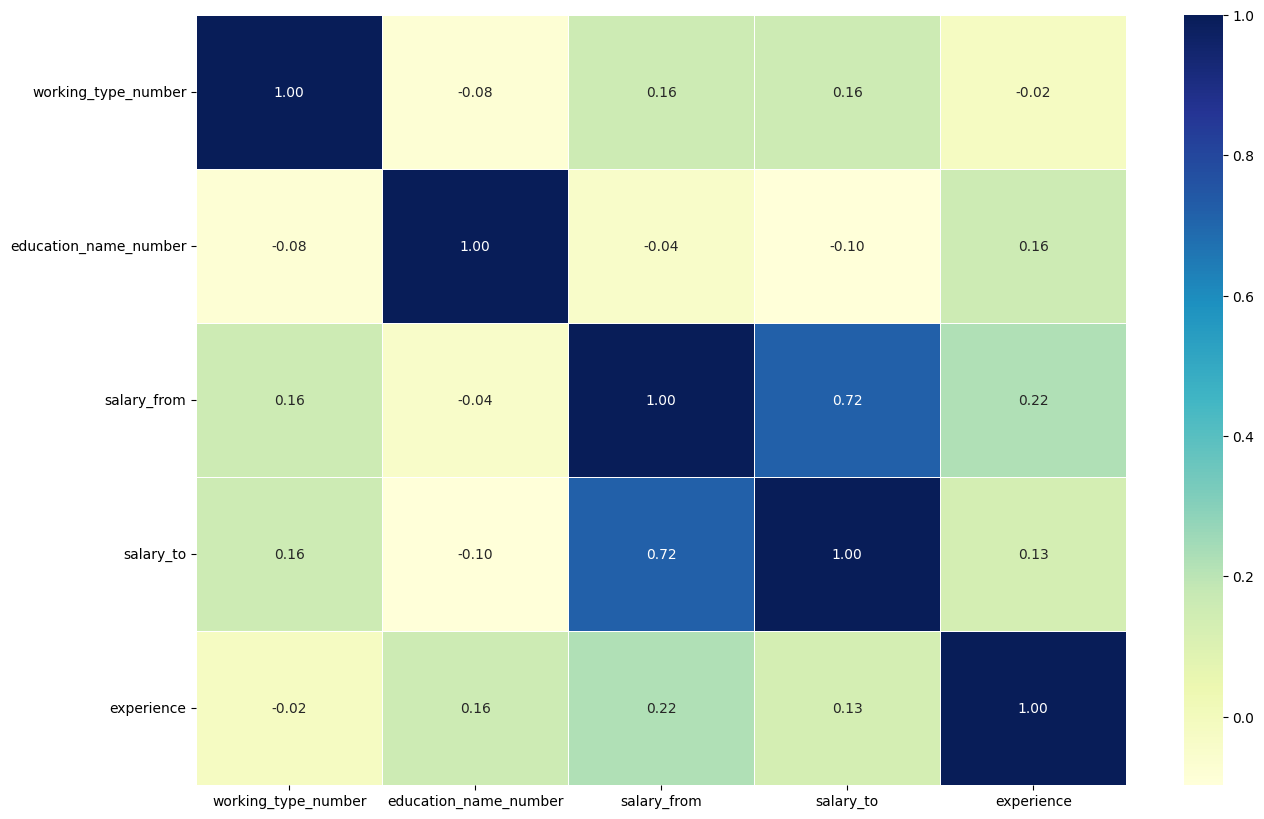

In [136]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

## **возможные применения этих данных в контексте машинного обучения.**

В машинном обучении данные о вакансиях и заработной плате могут использоваться различными способами, такими как прогнозирование заработной платы на основе должностных инструкций или прогнозирование количества вакансий на основе рыночной тенденции.